## Load modules

In [3]:
import numpy as np
import pandas as pd
from nilearn import datasets, image
from nilearn.input_data import NiftiLabelsMasker
import os

## Download  Schaefer 2018 17-network Atlas

[get_dataset_dir] Dataset found in /Users/hyunsung/nilearn_data/schaefer_2018


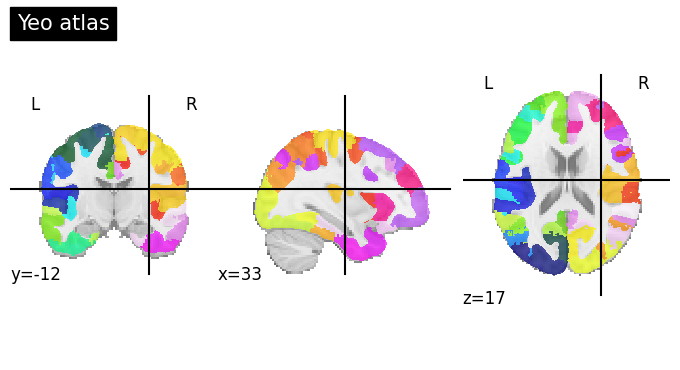

In [4]:
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=400, yeo_networks=17, resolution_mm=1)
atlas_filename = atlas.maps  # 1mm 해상도의 Atlas 이미지
labels = [x.decode() for x in atlas.labels]  # ROI 이름 리스트

from nilearn.plotting import plot_roi, show
plot_roi(atlas.maps, title="Yeo atlas")

## Function for extracting fMRI signals

In [50]:
def extract_signals(dir_path, save_dir_path):
    # patient id numbers
    ids = [f for f in os.listdir(dir_path) if f.isdigit()]

    for i, f in enumerate(ids):
        file_path = dir_path + f
        nii_file = [ff for ff in os.listdir(file_path) 
                    if ff.startswith("sfnwmrda") and ff.endswith(".nii.gz")][0]
        print(nii_file)

        nii_file = file_path + "/" + nii_file
        fmri_img = image.load_img(nii_file)  # Load fMRI data (nii.gz file)

        # Resample atlas
        resampled_atlas = image.resample_to_img(atlas_filename, fmri_img, interpolation="nearest", force_resample=True, copy_header=True)
        # resampled_atlas.shape

        # Extract fMRI time series for each ROI
        masker = NiftiLabelsMasker(labels_img=resampled_atlas, standardize=False)
        time_series = masker.fit_transform(fmri_img)
        time_series_df = pd.DataFrame(time_series, columns=labels).T
        time_series_df = time_series_df.reset_index().rename(columns={"index": "RegionName"})
        # time_series.shape

        # Save as csv files
        time_series_df.to_csv(save_dir_path + f + ".csv", index=False)

        # # Concatenate with phenotypes data
        # # df = pd.DataFrame(time_series, columns=labels).T
        # df = data_pheno[data_pheno['ScanDir ID'] == int(f)]
        # df = df.loc[df.index.repeat(len(labels))].reset_index(drop=True)
        # df = pd.concat([df, time_series_df], axis=1)
        # # print(df.shape)

        # # Save as csv files
        # df.to_csv(save_dir_path + f + ".csv", index=False)

## Load Peking training data and preprocessing

In [ ]:
# Peking_1
extract_signals(dir_path="./ADHD-200/Peking_1/", 
                save_dir_path="./ADHD-200/nilearn_preprocess/Peking_train/")

sfnwmrda1133221_session_1_rest_1.nii.gz
sfnwmrda9093997_session_1_rest_1.nii.gz
sfnwmrda4091983_session_1_rest_1.nii.gz
sfnwmrda4095748_session_1_rest_1.nii.gz
sfnwmrda1805037_session_1_rest_1.nii.gz
sfnwmrda7093319_session_1_rest_1.nii.gz
sfnwmrda1791543_session_1_rest_1.nii.gz
sfnwmrda3306863_session_1_rest_1.nii.gz
sfnwmrda3707771_session_1_rest_1.nii.gz
sfnwmrda2123983_session_1_rest_1.nii.gz
sfnwmrda4475709_session_1_rest_1.nii.gz
sfnwmrda1186237_session_1_rest_1.nii.gz
sfnwmrda1469171_session_1_rest_1.nii.gz
sfnwmrda2897046_session_1_rest_1.nii.gz
sfnwmrda1408093_session_1_rest_1.nii.gz
sfnwmrda8838009_session_1_rest_1.nii.gz
sfnwmrda5193577_session_1_rest_1.nii.gz
sfnwmrda1139030_session_1_rest_1.nii.gz
sfnwmrda3587000_session_1_rest_1.nii.gz
sfnwmrda5150328_session_1_rest_1.nii.gz
sfnwmrda9221927_session_1_rest_1.nii.gz
sfnwmrda2703336_session_1_rest_1.nii.gz
sfnwmrda2538839_session_1_rest_1.nii.gz
sfnwmrda3086074_session_1_rest_1.nii.gz
sfnwmrda2249443_session_1_rest_1.nii.gz


In [ ]:
# Peking_2
extract_signals(dir_path="./ADHD-200/Peking_2/", 
                save_dir_path="./ADHD-200/nilearn_preprocess/Peking_train/")

sfnwmrda2559537_session_1_rest_1.nii.gz
sfnwmrda1177160_session_1_rest_1.nii.gz
sfnwmrda3856956_session_1_rest_1.nii.gz
sfnwmrda1628610_session_1_rest_1.nii.gz
sfnwmrda5993008_session_1_rest_1.nii.gz
sfnwmrda3655623_session_1_rest_1.nii.gz
sfnwmrda2529026_session_1_rest_1.nii.gz
sfnwmrda3562883_session_1_rest_1.nii.gz
sfnwmrda2950754_session_1_rest_1.nii.gz
sfnwmrda7253183_session_1_rest_1.nii.gz
sfnwmrda9002207_session_1_rest_1.nii.gz
sfnwmrda8278680_session_1_rest_1.nii.gz
sfnwmrda1050975_session_1_rest_1.nii.gz
sfnwmrda1860323_session_1_rest_1.nii.gz
sfnwmrda1093743_session_1_rest_1.nii.gz
sfnwmrda2207418_session_1_rest_1.nii.gz
sfnwmrda1159908_session_1_rest_1.nii.gz
sfnwmrda9640133_session_1_rest_1.nii.gz
sfnwmrda1068505_session_1_rest_1.nii.gz
sfnwmrda1875013_session_1_rest_1.nii.gz
sfnwmrda6500128_session_1_rest_1.nii.gz
sfnwmrda3157406_session_1_rest_1.nii.gz
sfnwmrda2377207_session_1_rest_1.nii.gz
sfnwmrda3248920_session_1_rest_1.nii.gz
sfnwmrda1562298_session_1_rest_1.nii.gz


In [ ]:
# Peking_3
extract_signals(dir_path="./ADHD-200/Peking_3/", 
                save_dir_path="./ADHD-200/nilearn_preprocess/Peking_train/")

sfnwmrda2268253_session_1_rest_1.nii.gz
sfnwmrda4048810_session_1_rest_1.nii.gz
sfnwmrda3803759_session_1_rest_1.nii.gz
sfnwmrda2228148_session_1_rest_1.nii.gz
sfnwmrda3624598_session_1_rest_1.nii.gz
sfnwmrda1050345_session_1_rest_1.nii.gz
sfnwmrda1771270_session_1_rest_1.nii.gz
sfnwmrda2524687_session_1_rest_1.nii.gz
sfnwmrda6383713_session_1_rest_1.nii.gz
sfnwmrda1794770_session_1_rest_1.nii.gz
sfnwmrda2276801_session_1_rest_1.nii.gz
sfnwmrda1662160_session_1_rest_1.nii.gz
sfnwmrda2940712_session_1_rest_1.nii.gz
sfnwmrda4241194_session_1_rest_1.nii.gz
sfnwmrda4136226_session_1_rest_1.nii.gz
sfnwmrda3672300_session_1_rest_1.nii.gz
sfnwmrda1843546_session_1_rest_1.nii.gz
sfnwmrda2907951_session_1_rest_1.nii.gz
sfnwmrda1356553_session_1_rest_1.nii.gz
sfnwmrda3224401_session_1_rest_1.nii.gz
sfnwmrda3473830_session_1_rest_1.nii.gz
sfnwmrda1404738_session_1_rest_1.nii.gz
sfnwmrda3291029_session_1_rest_1.nii.gz
sfnwmrda2208591_session_1_rest_1.nii.gz
sfnwmrda7994085_session_1_rest_1.nii.gz
